# Toronto House Price Prediction

In [43]:
# Initial imports

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sb # visualization


### Download dataset, explore and clean dataset

In [2]:
df_brt = pd.read_csv('https://raw.githubusercontent.com/zuwulin/final_project/ari_branch/brampton_houses.csv')
df_mrk = pd.read_csv('https://raw.githubusercontent.com/zuwulin/final_project/ari_branch/markham_houses.csv')
df_tot = pd.read_csv('https://raw.githubusercontent.com/zuwulin/final_project/ari_branch/toronto_houses.csv')
df_msg = pd.read_csv('https://raw.githubusercontent.com/zuwulin/final_project/ari_branch/mississauga_houses.csv')
df_vgh = pd.read_csv('https://raw.githubusercontent.com/zuwulin/final_project/ari_branch/vaughan_houses.csv')
df_master = pd.read_csv('https://raw.githubusercontent.com/zuwulin/final_project/ari_branch/GTA_houses_combined_precleaning.csv')


In [3]:

df_brt.to_csv('brampton_houses.csv')
df_mrk.to_csv('markham_houses.csv')
df_tot.to_csv('toronto_houses.csv')
df_msg.to_csv('mississauga_houses.csv')
df_vgh.to_csv('vaughan_houses.csv')
#df_master.to_csv('GTA_houses_combined_precleaning.csv')

In [36]:
df_brt.shape

(400, 88)

In [37]:
df_mrk.shape

(400, 87)

In [38]:
df_tot.shape

(800, 92)

In [39]:
df_msg.shape

(400, 91)

In [40]:
df_vgh.shape

(400, 91)

In [41]:
df_master.columns.tolist()

['Unnamed: 0',
 'imgSrc',
 'detailUrl',
 'address',
 'addressCity',
 'addressZipcode',
 'beds',
 'baths',
 'price',
 'latitude',
 'longitude',
 'homeType']

In [44]:
# Check the dimension of the dataset
df_master.shape

(2400, 12)

In [45]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2400 non-null   int64  
 1   imgSrc          2400 non-null   object 
 2   detailUrl       2400 non-null   object 
 3   address         2400 non-null   object 
 4   addressCity     2400 non-null   object 
 5   addressZipcode  2400 non-null   object 
 6   beds            2400 non-null   int64  
 7   baths           2400 non-null   int64  
 8   price           2400 non-null   object 
 9   latitude        2400 non-null   float64
 10  longitude       2400 non-null   float64
 11  homeType        2400 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 225.1+ KB


In [45]:
df1 = pd.read_csv('brampton.csv')
df2 = pd.read_csv('markham.csv')
df3 = pd.read_csv('toronto.csv')
df4 = pd.read_csv('mississauga.csv')
df5 = pd.read_csv('vaughan.csv')

In [48]:
df_combined = pd.concat([df1, df2, df3, df4, df5], ignore_index=False)


In [49]:
df_combined.head()

,no,Address,zipcode,city,latitude,longitude,price,bathrooms,bedrooms,homeType
0,0,120 Church St E,L6V1G8,Brampton,43.694460,-79.756256,1,2,3,SINGLE_FAMILY
1,1,128 Church St E,L6V1G8,Brampton,43.694798,-79.755770,1,2,2,SINGLE_FAMILY
2,2,3 Sophia St,L6V1T8,Brampton,43.694980,-79.756850,1,2,3,SINGLE_FAMILY
3,3,1A Sophia St,L6V1T8,Brampton,43.694664,-79.756470,1,2,2,SINGLE_FAMILY
4,4,1 Sophia St,L6V1T8,Brampton,43.694763,-79.756680,1,3,4,SINGLE_FAMILY


In [111]:
df_combined.tail()

,Address,zipcode,city,latitude,longitude,price,bathrooms,bedrooms,homeType
392,10 Windrush Rd,L0J1C0,Vaughan,43.84832,-79.623740,7998000,9,5,SINGLE_FAMILY
395,1 Cordoba Dr #UPH801,L4J8S3,Vaughan,43.79430,-79.446880,10500000,11,5,CONDO
397,31 Thornbank Rd,L4J2A1,Vaughan,43.81835,-79.437300,11750000,10,6,SINGLE_FAMILY
398,139 Coldspring Rd,L0J1C0,Vaughan,43.83860,-79.641716,12998888,9,5,SINGLE_FAMILY
399,12151 Albion Vaughan Rd,L0J1C0,Vaughan,43.86965,-79.756000,13500000,6,4,SINGLE_FAMILY


In [89]:
# drop column "no" with object datatype
df_combined = df_combined.drop(columns=['no'])

In [23]:
df_combined.to_csv('GTA_houses_precleaning.csv')

In [90]:
df_combined.shape


(2399, 9)

In [91]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2399 entries, 0 to 399
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Address    2399 non-null   object 
 1   zipcode    2399 non-null   object 
 2   city       2399 non-null   object 
 3   latitude   2000 non-null   float64
 4   longitude  2000 non-null   float64
 5   price      2399 non-null   int64  
 6   bathrooms  2399 non-null   int64  
 7   bedrooms   2399 non-null   int64  
 8   homeType   2399 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 187.4+ KB


In [92]:
# Find columns with missing values and their percentage missing
df_combined.isnull().sum()                                                     
miss_val = df_combined.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df_combined.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df_combined.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
latitude,399,16.63
longitude,399,16.63


In [93]:
# drop rows with any missing values
df_combined.dropna(inplace=True)

In [94]:
# Check the dimension of the dataset
df_combined.shape

(2000, 9)

In [95]:
# Export the Dataframe as a new CSV file without the index

df_combined.to_csv('GTA_houses_aftercleaning.csv', index=False)

In [96]:
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 399
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Address    2000 non-null   object 
 1   zipcode    2000 non-null   object 
 2   city       2000 non-null   object 
 3   latitude   2000 non-null   float64
 4   longitude  2000 non-null   float64
 5   price      2000 non-null   int64  
 6   bathrooms  2000 non-null   int64  
 7   bedrooms   2000 non-null   int64  
 8   homeType   2000 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 156.2+ KB


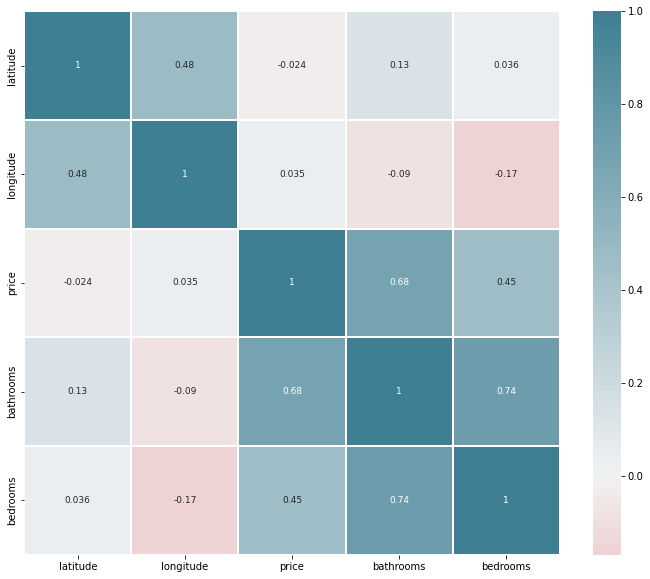

In [98]:
# Create features Heatmap to see how features are correlated with sale price

def correlantion_heatmap(df, center = None):
    fig, ax = plt.subplots(figsize = [12,10])
    colormap = sb.diverging_palette(10, 220, as_cmap=True)
    fig = sb.heatmap(df.corr(),
                cmap = colormap,
               center = center,
                annot = True,
                linewidths = 0.1,
                annot_kws={'fontsize':9})
    
    
correlantion_heatmap(df_combined, center=0)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

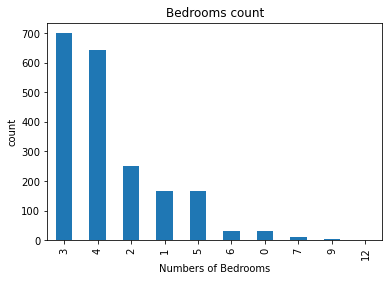

In [99]:
# What type of house based on bedrooms are the most popular selling
df_combined['bedrooms'].value_counts().plot(kind = 'bar')
plt.title('Bedrooms count')
plt.xlabel('Numbers of Bedrooms')
plt.ylabel('count')
sb.despine

C:\Users\ttran\Anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x432 with 0 Axes>

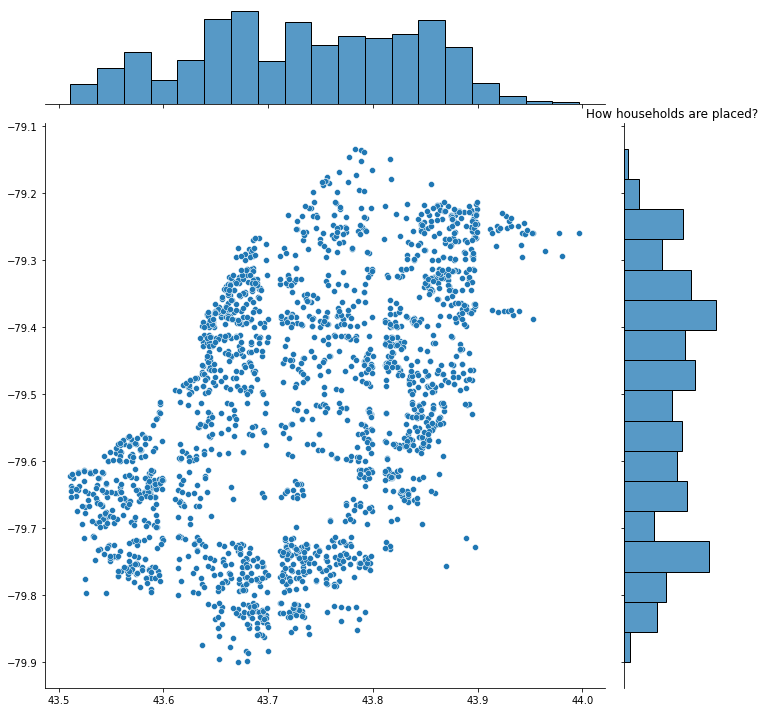

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [100]:
# Which location based on latitude and longitude are common location and how the houses are located
plt.figure (figsize =(6,6))
sb.jointplot(x=df_combined.latitude.values, y=df_combined.longitude.values, size = 10)
plt.ylabel('longitude', fontsize = 12)
plt.xlabel('latitude', fontsize = 12)
plt.title('How households are placed?')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
sb.despine

Text(0.5, 1.0, 'Price versus Location of the area')

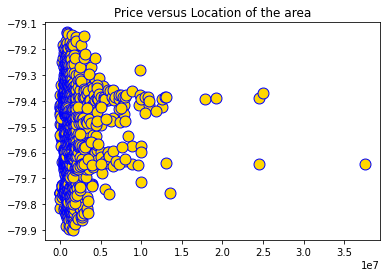

In [101]:
# Commom factors are affecting the price of houses: sale price, number of bedrooms, number of bathroons, ...
# price versus longitude
plt.scatter(df_combined.price, df_combined.longitude, color = 'gold', edgecolor = 'b', s = 120)
plt.title('Price versus Location of the area')

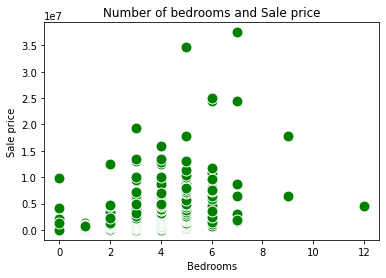

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [81]:
# price versus number of bedrooms
plt.scatter(df_combined.bedrooms, df_combined.price, color = 'green', edgecolor = 'white', s = 120)
plt.title('Number of bedrooms and Sale price')
plt.xlabel('Bedrooms')
plt.ylabel('Sale price')
plt.show()
sb.despine

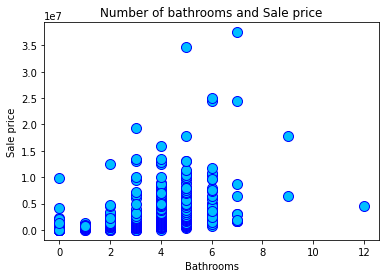

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [76]:
# price versus number of bedrooms
plt.scatter(df_combined.bedrooms, df_combined.price, color = 'deepskyblue', edgecolor = 'b', s = 120)
plt.title('Number of bathrooms and Sale price')
plt.xlabel('Bathrooms')
plt.ylabel('Sale price')
plt.show()
sb.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

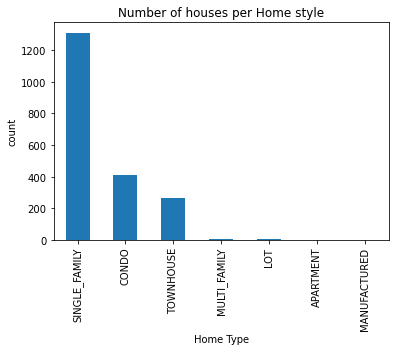

In [110]:
# price versus homeType
df_combined['homeType'].value_counts().plot(kind = 'bar')
plt.title('Number of houses per Home style')
plt.xlabel('Home Type')
plt.ylabel('count')
sb.despine


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

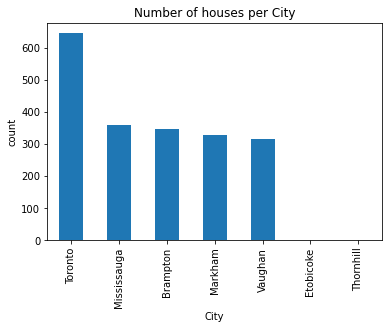

In [109]:
# What type of house based on bedrooms are the most popular selling
df_combined['city'].value_counts().plot(kind = 'bar')
plt.title('Number of houses per City')
plt.xlabel('City')
plt.ylabel('count')
sb.despine